Evaluate prediction accuracy in the field

In [7]:
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

# Ignore the warning message
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# load and merge
df = pickle.load(open("../00_data/cleaned/predictions.pkl", "rb"))
df = df[
    [
        "ID",
        "UebungsID",
        "UserID",
        "SatzID",
        "prediction",
        "modus",
        "interventiongroup",
        "Minute",
    ]
]

xmlsaetze = pickle.load(open("../00_data/cleaned/xmlsaetze.pkl", "rb"))
xmlsaetze["Minute"] = pd.to_datetime(xmlsaetze["Datum"]).dt.minute
xmlsaetze = xmlsaetze[
    [
        "ID",
        "UebungsID",
        "UserID",
        "SatzID",
        "Erfolg",
        "Minute",
        "MehrfachFalsch",
        "Testposition",
    ]
]

df_merged = pd.merge(xmlsaetze, df, on=["UserID", "UebungsID", "SatzID", "Minute"])

In [ ]:
# get metrics
evaluation = df_merged[["Erfolg", "prediction"]]


def test(evaluation):
    if evaluation.Erfolg == True:
        if evaluation.prediction > 0.5:
            return 1  # true positiv
        else:
            return 0  # false negativ
    elif evaluation.Erfolg == False:
        if evaluation.prediction < 0.5:
            return 3  # true negative
        else:
            return 4  # false positiv
    else:
        return 0


evaluation["correct"] = df_merged.apply(lambda row: test(row), axis=1)
evaluation_grouped = evaluation.groupby(["correct"])["Erfolg"].count()

In [10]:
# calculate evaluation metrics
precision = evaluation_grouped[1] / (evaluation_grouped[1] + evaluation_grouped[4])
recall = evaluation_grouped[1] / (evaluation_grouped[1] + evaluation_grouped[0])
accuracy = (evaluation_grouped[1] + evaluation_grouped[3]) / (
    evaluation_grouped[1]
    + evaluation_grouped[3]
    + evaluation_grouped[4]
    + evaluation_grouped[0]
)

In [11]:
print(accuracy)
print(recall)
print(precision)

0.8001518689144064
0.8771288082894265
0.8214692764297808


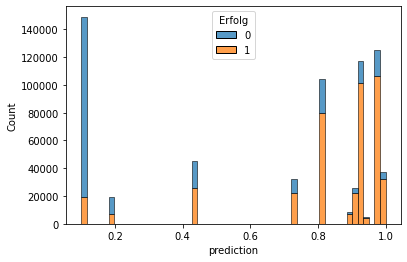

In [12]:
# plot predictions and acutal outcome
g = sns.histplot(data=evaluation, x="prediction", hue="Erfolg", multiple="stack")
sns.move_legend(g, "upper center")